In [ ]:
code = """
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image, ImageOps
from streamlit_drawable_canvas import st_canvas

# Load or train model
@st.cache_resource
def load_model():
    (x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
    x_train = x_train / 255.0
    y_train_cat = tf.keras.utils.to_categorical(y_train, 10)

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train_cat, epochs=3, verbose=0)
    return model

model = load_model()

st.title("🧠 MNIST Digit Recognizer")
st.markdown("Draw a digit (0-9) below and click Predict")

# Canvas
canvas_result = st_canvas(
    fill_color="white",
    stroke_width=15,
    stroke_color="black",
    background_color="white",
    height=280,
    width=280,
    drawing_mode="freedraw",
    key="canvas",
)

if canvas_result.image_data is not None:
    img = Image.fromarray((255 - canvas_result.image_data[:, :, 0]).astype(np.uint8))
    img = img.resize((28, 28)).convert('L')
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 28, 28)

    if st.button("Predict"):
        prediction = model.predict(img_array)
        digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        st.success(f"Predicted Digit: **{digit}** with {confidence:.2f}% confidence")
        st.image(img, caption="Processed Image (28x28)", width=150)
"""

with open("mnist_app.py", "w") as f:
    f.write(code)

In [ ]:
import tensorflow as tf
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=3, batch_size=32, verbose=1)
model.evaluate(x_test, y_test_cat)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8792 - loss: 0.4272
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9645 - loss: 0.1181
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.0757
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0948


[0.08425870537757874, 0.9732000231742859]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving digit.png to digit.png


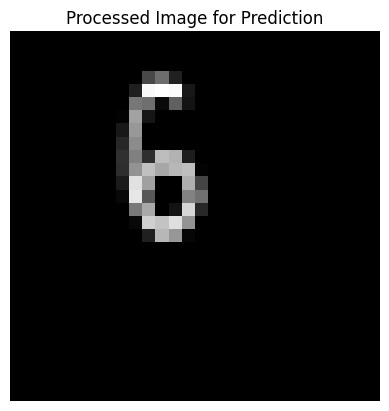

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# Load and process image
img = Image.open("digit.png").convert("L")  # L = grayscale
img = ImageOps.invert(img)  # Invert colors
img = img.resize((28, 28))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28)

# Display processed image
plt.imshow(img_array[0], cmap='gray')
plt.title("Processed Image for Prediction")
plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)
confidence = np.max(prediction) * 100

print(f"Predicted Digit: {predicted_digit} with {confidence:.2f}% confidence")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Digit: 5 with 68.72% confidence
